In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle

# Load dataset
df = pd.read_csv(r"C:\Users\hball\Downloads\crop-management-system-main\crop-management-system-main\fertilizer_recommendation.csv")

# Encode categorical features
soil_encoder = LabelEncoder()
crop_encoder = LabelEncoder()
fertilizer_encoder = LabelEncoder()  # For target column

df['Soil Type'] = soil_encoder.fit_transform(df['Soil Type'])  
df['Crop Type'] = crop_encoder.fit_transform(df['Crop Type'])  
df['Fertilizer Name'] = fertilizer_encoder.fit_transform(df['Fertilizer Name'])  # Encode Target

# Save the target encoder (important for decoding predictions later)
with open("fertilizer_encoder.pkl", "wb") as f:
    pickle.dump(fertilizer_encoder, f)

# Define features (X) and target (y)
X = df.drop(columns=['Fertilizer Name'])  
y = df['Fertilizer Name']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load trained model
with open("fertilizer_model.pkl", "rb") as file:
    model = pickle.load(file)

# Predict and calculate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100

print(f"Model Accuracy: {accuracy:.2f}%")


c:\Users\hball\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\hball\AppData\Local\Programs\Orange\Lib\site-packages\sklearn\base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.2 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AttributeError: 'DecisionTreeClassifier' object has no attribute 'monotonic_cst'

In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hball\Downloads\crop-management-system-main\crop-management-system-main\fertilizer_recommendation.csv")
print(df.columns)  # Prints all column names


Index(['Temparature', 'Humidity', 'Soil Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [ ]:
import pandas as pd

df = pd.read_csv(r"C:\Users\hball\Downloads\crop-management-system-main\crop-management-system-main\crop_production_india.csv")
print(df.columns)  # Prints all column names

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import pickle

# Load dataset
df = pd.read_csv(r"C:\Users\hball\Downloads\crop-management-system-main\crop-management-system-main\crop_production_india.csv")  # Update the file path

# Encode categorical features
state_encoder = LabelEncoder()
district_encoder = LabelEncoder()
season_encoder = LabelEncoder()
crop_encoder = LabelEncoder()

df['State_Name'] = state_encoder.fit_transform(df['State_Name'])
df['District_Name'] = district_encoder.fit_transform(df['District_Name'])
df['Season'] = season_encoder.fit_transform(df['Season'])
df['Crop'] = crop_encoder.fit_transform(df['Crop'])

# Save encoders for future use
with open("yield_encoders.pkl", "wb") as f:
    pickle.dump((state_encoder, district_encoder, season_encoder, crop_encoder), f)

# Define features (X) and target (y)
X = df.drop(columns=['Production'])  # Features
y = df['Production']  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load trained model
with open("crop_production_model.pkl", "rb") as file:
    model = pickle.load(file)

# Predict and calculate accuracy metrics
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) * 100  # Convert to %

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}%")


FileNotFoundError: [Errno 2] No such file or directory: 'crop_production_model.pkl'

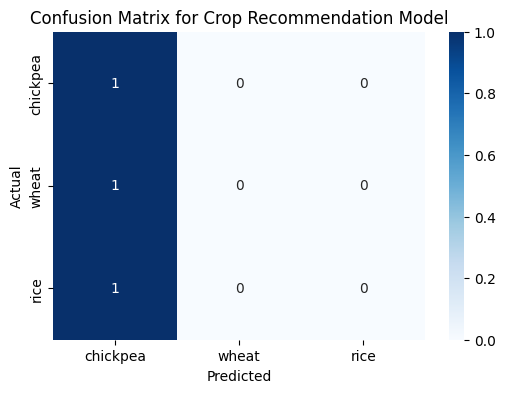

In [ ]:
import pickle
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the trained Random Forest model
with open('crop_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Example test data (replace with your actual test data)
# X_test: Feature data (soil and climate conditions)
X_test = np.array([
    [30, 50, 70, 6.5, 25, 70, 150],  # Example input features
    [40, 60, 80, 7.0, 22, 65, 120],  # Another example input
    [35, 55, 75, 6.8, 24, 72, 130]   # Another example input
])

# y_test: Actual crop labels (replace with your actual labels)
# These should be the same labels as your model predicts (e.g., 'chickpea', 'wheat', 'rice')
y_test = np.array(['chickpea', 'wheat', 'rice'])  # Actual crop names

# Make predictions using the trained model
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['chickpea', 'wheat', 'rice'])

# Plotting the confusion matrix using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['chickpea', 'wheat', 'rice'], 
            yticklabels=['chickpea', 'wheat', 'rice'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Crop Recommendation Model')
plt.show()
